In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from diffdrr.drr import DRR

## DiffDRR camera matrix conventions

In [ ]:
#|code-fold: true
sdr = 1.0
alpha, gamma, beta = 0, 0, 0
bx, by, bz = 10, -10, -40
rotations = torch.Tensor([[alpha, beta, gamma]])
translations = torch.tensor([[bx, by, bz]])

drr = DRR(
    volume=np.zeros([512, 512, 133]),
    spacing=[1, 1, 1],
    sdr=sdr,
    height=5,
    delx=0.75,
).to("cpu")

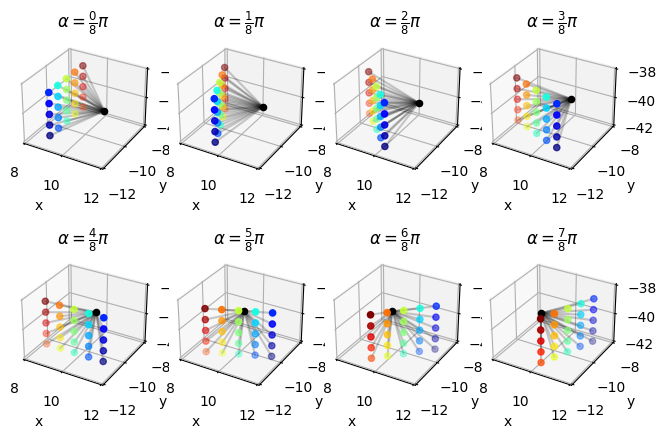

In [ ]:
fig = plt.figure()
for i in range(8):
    alpha = (i / 8) * torch.pi
    beta = (0 / 8) * torch.pi
    gamma = (0 / 8) * torch.pi
    rotations = torch.Tensor([[alpha, beta, gamma]])
    
    source, rays = drr.detector(rotations, translations, "euler_angles", "ZYX")
    source_ = source.detach().cpu()
    rays_ = rays.permute(2, 0, 1).detach().cpu()

    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    ax.set(title=f"$\\alpha=\\frac{{{i}}}{{8}}\pi$")
    ax.scatter(source_[0, 0, 0]  , source_[0, 0, 1]  , source_[0, 0, 2]  , c="black")
    ax.scatter(rays_[0].flatten(), rays_[1].flatten(), rays_[2].flatten(), c=torch.arange(25), cmap="jet")

    xs, ys, zs = rays_.reshape(3, -1)
    for x, y, z in zip(xs, ys, zs):
        ax.plot([source_[0, 0, 0], x], [source_[0, 0, 1], y], [source_[0, 0, 2], z], "k", alpha=0.2)

    ax.set(xlabel="x", ylabel="y", zlabel="z")
    ax.set(xlim=[8,12], ylim=[-12,-8], zlim=[-42,-38])

plt.tight_layout()
plt.show()

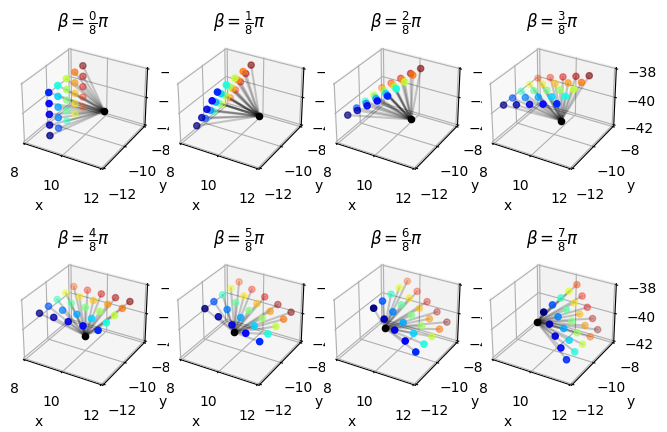

In [ ]:
fig = plt.figure()
for i in range(8):
    alpha = (0 / 8) * torch.pi
    beta = (i / 8) * torch.pi
    gamma = (0 / 8) * torch.pi
    rotations = torch.Tensor([[alpha, beta, gamma]])
    
    source, rays = drr.detector(rotations, translations, "euler_angles", "ZYX")
    source_ = source.detach().cpu()
    rays_ = rays.permute(2, 0, 1).detach().cpu()

    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    ax.set(title=f"$\\beta=\\frac{{{i}}}{{8}}\pi$")
    ax.scatter(source_[0, 0, 0]  , source_[0, 0, 1]  , source_[0, 0, 2]  , c="black")
    ax.scatter(rays_[0].flatten(), rays_[1].flatten(), rays_[2].flatten(), c=torch.arange(25), cmap="jet")

    xs, ys, zs = rays_.reshape(3, -1)
    for x, y, z in zip(xs, ys, zs):
        ax.plot([source_[0, 0, 0], x], [source_[0, 0, 1], y], [source_[0, 0, 2], z], "k", alpha=0.2)

    ax.set(xlabel="x", ylabel="y", zlabel="z")
    ax.set(xlim=[8,12], ylim=[-12,-8], zlim=[-42,-38])

plt.tight_layout()
plt.show()

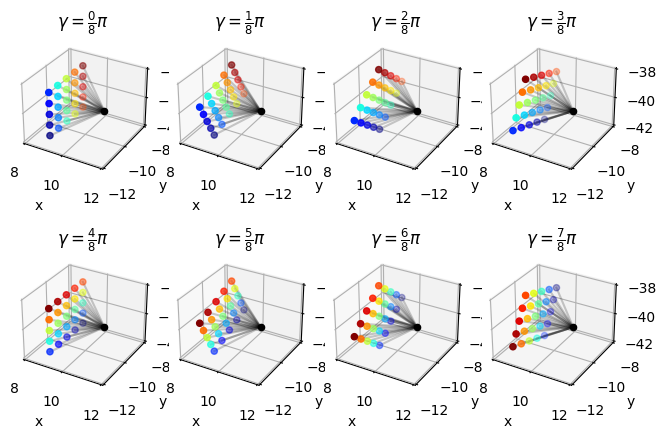

In [ ]:
fig = plt.figure()
for i in range(8):
    alpha = (0 / 8) * torch.pi
    beta = (0 / 8) * torch.pi
    gamma = (i / 8) * torch.pi
    rotations = torch.Tensor([[alpha, beta, gamma]])
    
    source, rays = drr.detector(rotations, translations, "euler_angles", "ZYX")
    source_ = source.detach().cpu()
    rays_ = rays.permute(2, 0, 1).detach().cpu()

    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    ax.set(title=f"$\\gamma=\\frac{{{i}}}{{8}}\pi$")
    ax.scatter(source_[0, 0, 0]  , source_[0, 0, 1]  , source_[0, 0, 2]  , label="Source", c="black")
    ax.scatter(rays_[0].flatten(), rays_[1].flatten(), rays_[2].flatten(), label="Targets", c=torch.arange(25), cmap="jet")

    xs, ys, zs = rays_.reshape(3, -1)
    for x, y, z in zip(xs, ys, zs):
        ax.plot([source_[0, 0, 0], x], [source_[0, 0, 1], y], [source_[0, 0, 2], z], "k", alpha=0.2)

    ax.set(xlabel="x", ylabel="y", zlabel="z")
    ax.set(xlim=[8,12], ylim=[-12,-8], zlim=[-42,-38])

plt.tight_layout()
plt.show()